11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9048 - loss: 0.3306 - val_accuracy: 0.9763 - val_loss: 0.0730
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9825 - loss: 0.0604 - val_accuracy: 0.9820 - val_loss: 0.0550
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accuracy: 0.9866 - val_loss: 0.0421
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9927 - loss: 0.0248 - val_accuracy: 0.9842 - val_loss: 0.0482
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9861 - val_loss: 0.0411
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9831 - val_loss: 0.0479
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9973 - loss: 0.0092 - val_accuracy: 0.9866 - val_loss: 0.0407
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step -

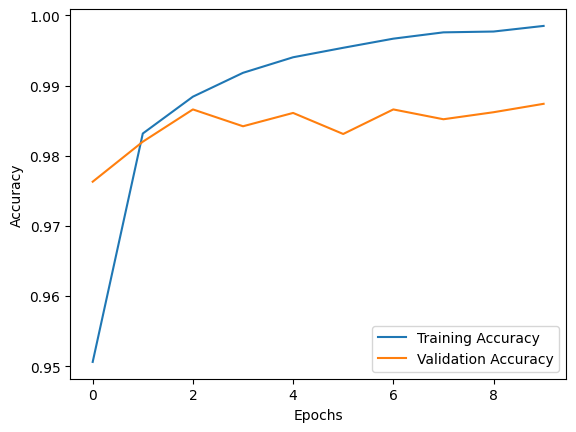

313/313 - 1s - 3ms/step - accuracy: 0.9874 - loss: 0.0456
Test Accuracy: 0.9873999953269958


In [58]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), batch_size=64)


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"Test Accuracy: {test_acc}")
